In [61]:
### from __future__ import division, absolute_import

import os
import sys
import random

import numpy as np
from tabulate import tabulate

#root
absPath = '/home/angela/padding_EBI/'
sys.path.insert(0, absPath)

#from src.Target import Target

np.random.seed(8)
random.seed(8)

from src.preprocessing import *
from src.model_architecture import *
from src.training_model import *
from src.postprocessing import *
from src.comparing_results import *

#para no imprimir warnings chungos
import warnings 
warnings.simplefilter("ignore")

#from src.callbacks import *
%matplotlib inline

### Defining parameters

In [47]:
list_paddings = [
    'post_padding', 'pre_padding', 'mid_padding', 
    'strf_padding', 'ext_padding', 
                 'rnd_padding', 
                 'aug_padding',
                'zoom_padding'
                ]
#list_paddings = ['aug_padding']
#list_padding_short = ['post_padding', 'pre_padding', 'mid_padding', 'stretch_padding', 'ext_padding', 
#                 'rdm_padding']
#hierarchy of folders: annotation/dataset/architecture/n_neurs/task/padding
folder1 = 'EC_number/archaea/1conv/64filts_size5/' 
folder2 = 'EC_number/archaea/3denses/bio_neurons/'
folder3 = 'EC_number/archaea/rnn_conv/256rnn/'
folder4 = 'EC_number/archaea/stack_conv/10filts_sizeJurtz/'
column = "EC number"

n_folds = 10

dicti = creating_dict()

max_lenn = 1000

In [48]:
folders = [folder1, folder2, folder3, folder4]
names_folders = ["1_conv", "only_denses", "bi_lstm", "stack_conv"]

## Comparing accuracy

### Task 1

In [79]:
task = "task1/"
task_string = "Task 1"

In [80]:
#folder = 'EC_number/archaea/1conv/64filts_size5/' 
scores_arch_task1, accu_arch_task1 = processing_metrics_dodge(list_paddings, folders, names_folders, task, n_folds)
scores_final_task1 = pd.concat([scores_arch_task1[0], scores_arch_task1[1], scores_arch_task1[2], scores_arch_task1[3]])
accu_final_task1 = pd.concat([accu_arch_task1[0], accu_arch_task1[1], accu_arch_task1[2], accu_arch_task1[3]])

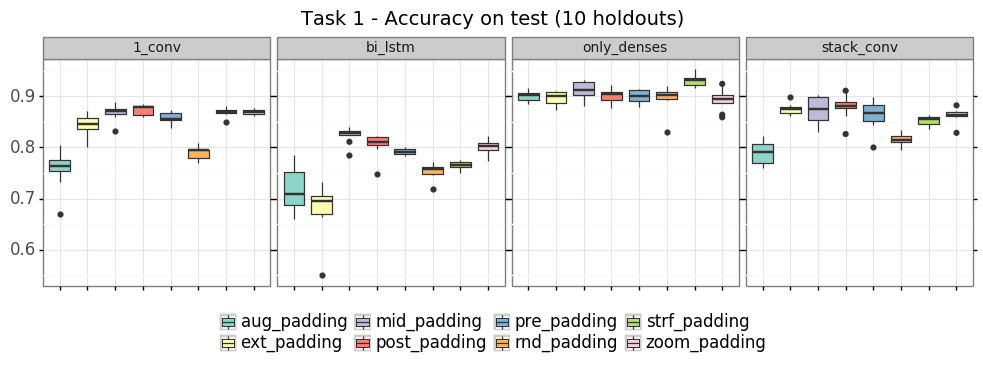

<ggplot: (8775956547213)>

In [81]:
plotting_acc_dodge_boxplots(accu_final_task1, n_folds, task_string, task)

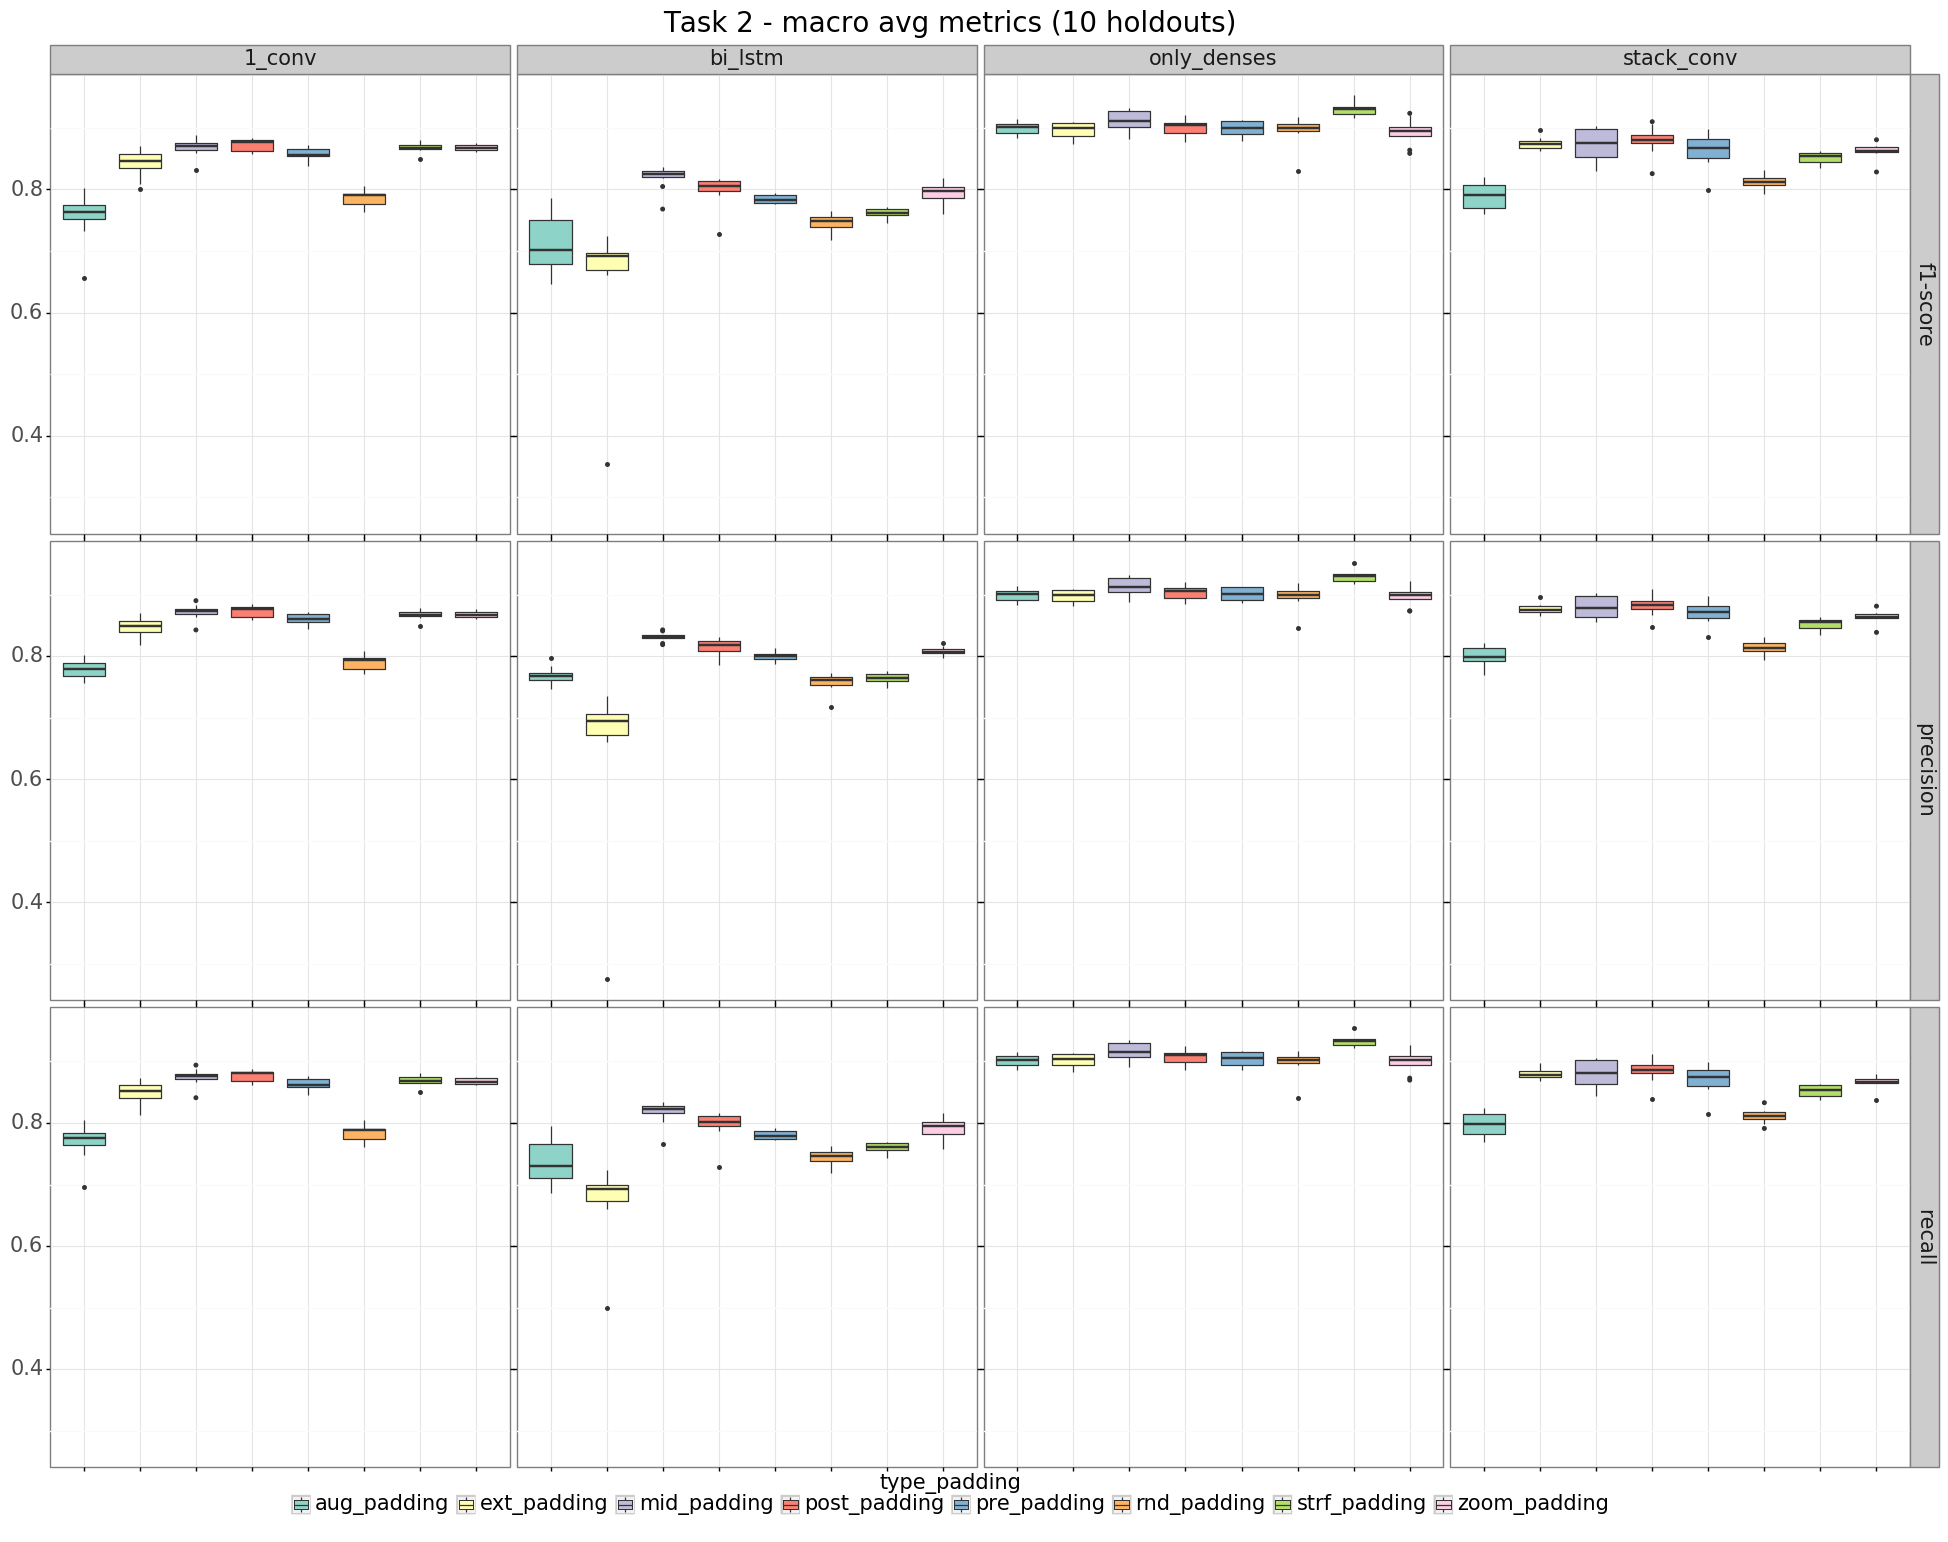

<ggplot: (8775959038984)>

In [127]:
plotting_scores_arch(scores_final_task1, n_folds, task_string, task, "macro avg")

In [143]:
def processing_auc_dodge(list_paddings, folders, names_folders,task, nfolds):
    """It process the saved metrics for AUC from the task 1 models and returns a dataframe with processed AUC on test"""
    auc_list = []
    for idx, folder in enumerate(folders):
        metrics, k = collecting_metrics_folds("auc", list_paddings, folder, task, nfolds)
        df_auc = processing_roc_auc(metrics, "auc", list_paddings)
        
        auc = df_auc.reset_index().drop("index",1)#.melt(id_vars="index")
        auc["architecture"] = names_folders[idx]
        auc_list.append(auc)

    return auc_list

In [146]:
auc_arch_task1 = processing_auc_dodge(list_paddings, folders, names_folders, "task1/", n_folds)
#len(auc_arch_task1)
auc_final_task1 = pd.concat([auc_arch_task1[0], auc_arch_task1[1], auc_arch_task1[2], auc_arch_task1[3]])
auc_final_task1.drop("level_0", 1, inplace=True)

### Task 2

In [83]:
task = "task2/"
task_string = "Task 2"

In [84]:
scores_arch_task2, accu_arch_task2 = processing_metrics_dodge(list_paddings, folders, names_folders, task, n_folds)
scores_final_task2 = pd.concat([scores_arch_task2[0], scores_arch_task2[1], scores_arch_task2[2], scores_arch_task2[3]])
accu_final_task2 = pd.concat([accu_arch_task2[0], accu_arch_task2[1], accu_arch_task2[2], accu_arch_task2[3]])

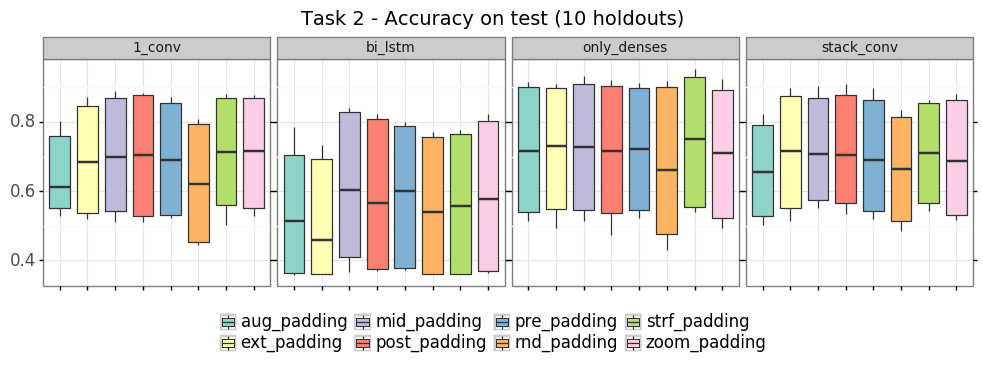

<ggplot: (-9223363260897290471)>

In [85]:
plotting_acc_dodge_boxplots(accu_final, n_folds, task_string, task)

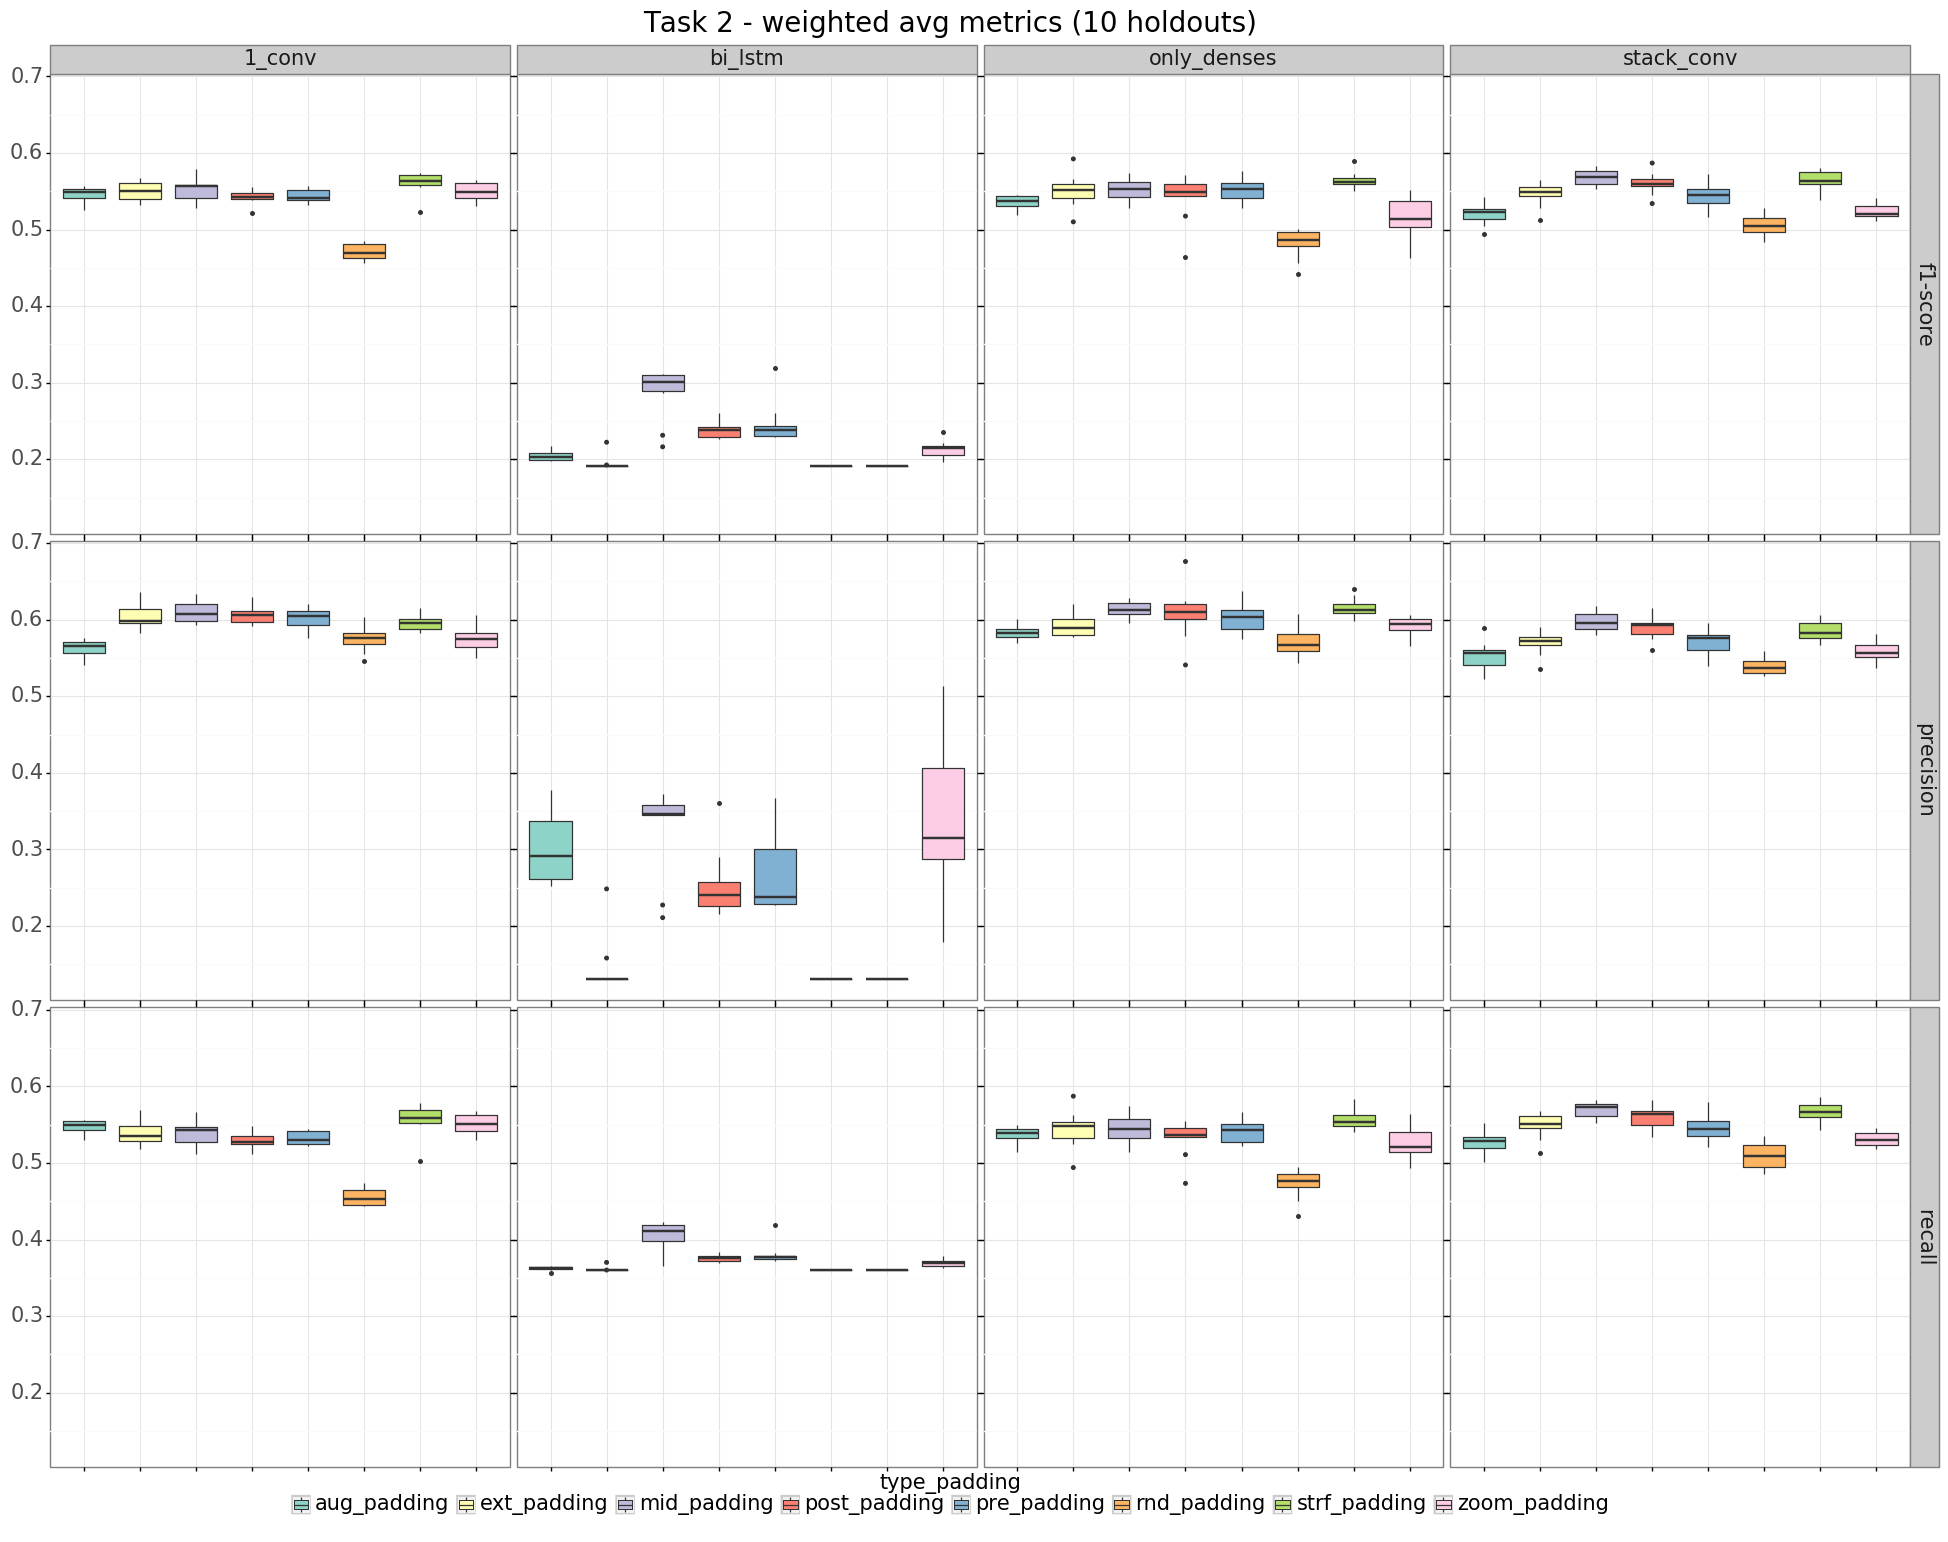

<ggplot: (8775958140494)>

In [86]:
plotting_scores_arch(scores_final_task2, n_folds, task_string, task, "macro avg")

# Formatting table

## Accuracy

In [114]:
#accu_final_task1.drop("index", 1, inplace=True)
accu_final_task1['task'] = "task1"
accu_final_task1.head()

#accu_final_task2.drop("index", 1, inplace=True)
accu_final_task2['task'] = "task2"
accu_final_task2.head()

#joining both dataframes
accu_final = pd.concat([accu_final_task1, accu_final_task2])
accu_final.head()

,index,variable,value,architecture,task
0,0,post_padding,0.859697,1_conv,task1
1,1,post_padding,0.882050,1_conv,task1
2,2,post_padding,0.878611,1_conv,task1
3,3,post_padding,0.877235,1_conv,task1
4,4,post_padding,0.869326,1_conv,task1


In [115]:
accu_group = accu_final.groupby(["task", "architecture", "variable"], as_index=False).agg({'value':['mean','std']})

In [116]:
print(tabulate(accu_group, headers="keys", tablefmt='psql'))

+----+----------------+------------------------+--------------------+---------------------+--------------------+
|    | ('task', '')   | ('architecture', '')   | ('variable', '')   |   ('value', 'mean') |   ('value', 'std') |
|----+----------------+------------------------+--------------------+---------------------+--------------------|
|  0 | task1          | 1_conv                 | aug_padding        |            0.757983 |         0.0370646  |
|  1 | task1          | 1_conv                 | ext_padding        |            0.842503 |         0.0225636  |
|  2 | task1          | 1_conv                 | mid_padding        |            0.868226 |         0.0155586  |
|  3 | task1          | 1_conv                 | post_padding       |            0.873212 |         0.0101715  |
|  4 | task1          | 1_conv                 | pre_padding        |            0.858494 |         0.010791   |
|  5 | task1          | 1_conv                 | rnd_padding        |            0.790096 |     

### me quedo con macro avg
### cambiar a tablefmt="latex"

## F1-score

In [118]:
#task 1
scores_final_task1_f1 = scores_final_task1[scores_final_task1.variable == "f1-score"]
scores_final_task1_f1_macro = scores_final_task1_f1[scores_final_task1_f1.enz_type == "macro avg"]
scores_final_task1_f1_macro["task"] = "task1"
scores_final_task1_f1_macro.head()

#task 2
scores_final_task2_f1 = scores_final_task2[scores_final_task2.variable == "f1-score"]
scores_final_task2_f1_macro = scores_final_task2_f1[scores_final_task2_f1.enz_type == "macro avg"]
scores_final_task2_f1_macro["task"] = "task2"
scores_final_task2_f1_macro.head()

#joining both dataframes
f1_final = pd.concat([scores_final_task1_f1_macro, scores_final_task2_f1_macro])
f1_final.drop(["index", "variable", "enz_type"],1,inplace=True)
f1_final.head()

,type_padding,architecture,value,task
3,post_padding,1_conv,0.859538,task1
8,pre_padding,1_conv,0.872689,task1
13,mid_padding,1_conv,0.863793,task1
18,strf_padding,1_conv,0.873687,task1
23,ext_padding,1_conv,0.847652,task1


In [119]:
f1_group = f1_final.groupby(["task", "architecture", "type_padding"], as_index=False).agg({'value':['mean','std']})

In [120]:
print(tabulate(f1_group, headers="keys", tablefmt='psql'))

+----+----------------+------------------------+------------------------+---------------------+--------------------+
|    | ('task', '')   | ('architecture', '')   | ('type_padding', '')   |   ('value', 'mean') |   ('value', 'std') |
|----+----------------+------------------------+------------------------+---------------------+--------------------|
|  0 | task1          | 1_conv                 | aug_padding            |           0.756062  |         0.0406065  |
|  1 | task1          | 1_conv                 | ext_padding            |           0.842251  |         0.0224963  |
|  2 | task1          | 1_conv                 | mid_padding            |           0.868098  |         0.0155023  |
|  3 | task1          | 1_conv                 | post_padding           |           0.872836  |         0.0100723  |
|  4 | task1          | 1_conv                 | pre_padding            |           0.858245  |         0.0106433  |
|  5 | task1          | 1_conv                 | rnd_padding    

## Precision

In [121]:
#task 1
scores_final_task1_precision = scores_final_task1[scores_final_task1.variable == "precision"]
scores_final_task1_precision_macro = scores_final_task1_precision[scores_final_task1_precision.enz_type == "macro avg"]
scores_final_task1_precision_macro["task"] = "task1"
scores_final_task1_precision_macro.head()

#task 2
scores_final_task2_precision = scores_final_task2[scores_final_task2.variable == "precision"]
scores_final_task2_precision_macro = scores_final_task2_precision[scores_final_task2_precision.enz_type == "macro avg"]
scores_final_task2_precision_macro["task"] = "task2"
scores_final_task2_precision_macro.head()

#joining both dataframes
precision_final = pd.concat([scores_final_task1_precision_macro, scores_final_task2_precision_macro])
precision_final.drop(["index", "variable", "enz_type"],1,inplace=True)
precision_final.head()

,type_padding,architecture,value,task
403,post_padding,1_conv,0.861687,task1
408,pre_padding,1_conv,0.872439,task1
413,mid_padding,1_conv,0.869068,task1
418,strf_padding,1_conv,0.872839,task1
423,ext_padding,1_conv,0.848181,task1


In [122]:
precision_group = precision_final.groupby(["task", "architecture", "type_padding"], as_index=False).agg({'value':['mean','std']})

In [123]:
print(tabulate(precision_group, headers="keys", tablefmt='psql'))

+----+----------------+------------------------+------------------------+---------------------+--------------------+
|    | ('task', '')   | ('architecture', '')   | ('type_padding', '')   |   ('value', 'mean') |   ('value', 'std') |
|----+----------------+------------------------+------------------------+---------------------+--------------------|
|  0 | task1          | 1_conv                 | aug_padding            |           0.77817   |         0.0144187  |
|  1 | task1          | 1_conv                 | ext_padding            |           0.847419  |         0.0160553  |
|  2 | task1          | 1_conv                 | mid_padding            |           0.871516  |         0.0127561  |
|  3 | task1          | 1_conv                 | post_padding           |           0.873208  |         0.00938968 |
|  4 | task1          | 1_conv                 | pre_padding            |           0.860566  |         0.00886135 |
|  5 | task1          | 1_conv                 | rnd_padding    

## Recall

In [124]:
#task 1
scores_final_task1_recall = scores_final_task1[scores_final_task1.variable == "recall"]
scores_final_task1_recall_macro = scores_final_task1_recall[scores_final_task1_recall.enz_type == "macro avg"]
scores_final_task1_recall_macro["task"] = "task1"
scores_final_task1_recall_macro.head()

#task 2
scores_final_task2_recall = scores_final_task2[scores_final_task2.variable == "recall"]
scores_final_task2_recall_macro = scores_final_task2_recall[scores_final_task2_recall.enz_type == "macro avg"]
scores_final_task2_recall_macro["task"] = "task2"
scores_final_task2_recall_macro.head()

#joining both dataframes
recall_final = pd.concat([scores_final_task1_recall_macro, scores_final_task2_recall_macro])
recall_final.drop(["index", "variable", "enz_type"],1,inplace=True)
recall_final.head()

,type_padding,architecture,value,task
803,post_padding,1_conv,0.864939,task1
808,pre_padding,1_conv,0.876094,task1
813,mid_padding,1_conv,0.870977,task1
818,strf_padding,1_conv,0.875267,task1
823,ext_padding,1_conv,0.851674,task1


In [125]:
recall_group = recall_final.groupby(["task", "architecture", "type_padding"], as_index=False).agg({'value':['mean','std']})

In [126]:
print(tabulate(recall_group, headers="keys", tablefmt='psql'))

+----+----------------+------------------------+------------------------+---------------------+--------------------+
|    | ('task', '')   | ('architecture', '')   | ('type_padding', '')   |   ('value', 'mean') |   ('value', 'std') |
|----+----------------+------------------------+------------------------+---------------------+--------------------|
|  0 | task1          | 1_conv                 | aug_padding            |            0.768426 |         0.0299386  |
|  1 | task1          | 1_conv                 | ext_padding            |            0.848549 |         0.0194662  |
|  2 | task1          | 1_conv                 | mid_padding            |            0.874162 |         0.014221   |
|  3 | task1          | 1_conv                 | post_padding           |            0.876632 |         0.00940472 |
|  4 | task1          | 1_conv                 | pre_padding            |            0.863345 |         0.00940717 |
|  5 | task1          | 1_conv                 | rnd_padding    

## AUC para task 1

In [148]:
auc_final_task1.head()

,variable,value,architecture
0,post_padding,0.939015,1_conv
1,post_padding,0.948821,1_conv
2,post_padding,0.946051,1_conv
3,post_padding,0.949160,1_conv
4,post_padding,0.945973,1_conv


In [149]:
auc_group = auc_final_task1.groupby(["architecture", "variable"], as_index=False).agg({'value':['mean','std']})
auc_group

architecture      variable     value          
                                   mean       std
0        1_conv   aug_padding  0.859490  0.020565
1        1_conv   ext_padding  0.927182  0.010968
2        1_conv   mid_padding  0.945122  0.008635
3        1_conv  post_padding  0.945257  0.007165
4        1_conv   pre_padding  0.935433  0.006144
5        1_conv   rnd_padding  0.870614  0.010538
6        1_conv  strf_padding  0.939065  0.006424
7        1_conv  zoom_padding  0.936801  0.003592
8       bi_lstm   aug_padding  0.889753  0.011071
9       bi_lstm   ext_padding  0.723358  0.041087
10      bi_lstm   mid_padding  0.903688  0.032355
11      bi_lstm  post_padding  0.878888  0.041548
12      bi_lstm   pre_padding  0.855311  0.011418
13      bi_lstm   rnd_padding  0.819670  0.011631
14      bi_lstm  strf_padding  0.848134  0.006797
15      bi_lstm  zoom_padding  0.877288  0.014969
16  only_denses   aug_padding  0.950722  0.009562
17  only_denses   ext_padding  0.966198  0.002572
18  only_denses   mid_padding  0.972111  0.005583
19  only_denses  post_padding  0.968915  0.003255
20  only_denses   pre_padding  0.966834  0.003956
21  only_denses   rnd_padding  0.946305  0.013889
22  only_denses  strf_padding  0.977670  0.003108
23  only_denses  zoom_padding  0.978306  0.004621
24   stack_conv   aug_padding  0.890948  0.013163
25   stack_conv   ext_padding  0.949242  0.004979
26   stack_conv   mid_padding  0.952380  0.009887
27   stack_conv  post_padding  0.956116  0.006541
28   stack_conv   pre_padding  0.949093  0.008273
29   stack_conv   rnd_padding  0.891414  0.009113
30   stack_conv  strf_padding  0.926546  0.006248
31   stack_conv  zoom_padding  0.944389  0.005439

In [150]:
print(tabulate(auc_group, headers="keys", tablefmt='psql'))

+----+------------------------+--------------------+---------------------+--------------------+
|    | ('architecture', '')   | ('variable', '')   |   ('value', 'mean') |   ('value', 'std') |
|----+------------------------+--------------------+---------------------+--------------------|
|  0 | 1_conv                 | aug_padding        |            0.85949  |         0.0205652  |
|  1 | 1_conv                 | ext_padding        |            0.927182 |         0.0109679  |
|  2 | 1_conv                 | mid_padding        |            0.945122 |         0.00863464 |
|  3 | 1_conv                 | post_padding       |            0.945257 |         0.0071652  |
|  4 | 1_conv                 | pre_padding        |            0.935433 |         0.00614386 |
|  5 | 1_conv                 | rnd_padding        |            0.870614 |         0.0105383  |
|  6 | 1_conv                 | strf_padding       |            0.939065 |         0.00642378 |
|  7 | 1_conv                 | zoom_pad